In [1]:
import os
import numpy as np
from time import time
from scipy.io import wavfile as wav

import matplotlib.pyplot as plt
import IPython.display as ipd

# Classification tools
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


import scipy.io.wavfile as wav
import IPython.display as ipd


## Data Import

In [2]:
sound_rate, sound_data = wav.read('C:/Users/sam/Desktop/DSP/data/recordings/recordings/0_jackson_0.wav')
# Play the signal

ipd.Audio(sound_data, rate=sound_rate)

sound_data.shape




(5148,)

In [3]:
sound_data.shape

(5148,)

In [4]:
# Placecholder for feature extractor
def identity(input):
    return input



In [5]:
# Define a function to load data
def load_data(directory, feature_extractor, normalize=False):
    features = []
    labels = []
    
    for f in os.listdir(directory):
        if f.endswith('.wav'):
            # Load file and compute the requested features
            _, signal = wav.read(os.path.join(directory, f))
            cur_features = feature_extractor(signal)
            features.append(cur_features)

            # Example: Assuming the label is part of the filename before an underscore
            label = f.split('_')[0]
            labels.append(label)
    
    # Convert to numpy arrays for easier manipulation
    X = np.array(features)
    y = np.array(labels)
    
    if normalize:
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # Split the data into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

# Feature Extraction

In [7]:
# Create sample data and corresponding feature
dummy_data = np.random.rand(100)
feats_scalar = np.std(dummy_data)
feats_vector = np.std(dummy_data, keepdims=True)

In [8]:
# Scalar feature
print(feats_scalar)
print(feats_scalar.shape)

0.29694332097248627
()


In [10]:
print(feats_vector)
print(feats_vector.shape)

[0.29694332]
(1,)


## Energy

In [10]:

def energy(input):
    return np.sum((input*1.0)**2, keepdims=True)

In [24]:
X_train, X_test, y_train, y_test = load_data('C:/Users/sam/Desktop/DSP/data/recordings/recordings', feature_extractor=energy)


In [25]:
# # Data loading
# X_train, X_test, y_train, y_test = load_data(feature_extractor=energy)
print('Numer of training examples: {}'.format(len(X_train)))
print('Dimensionality of the training features: {}'.format(X_train[0].shape))

Numer of training examples: 1350
Dimensionality of the training features: (1,)


In [26]:
# Support Vector Machine (SVM) initialization
clf = SVC(kernel='rbf', class_weight='balanced')

In [27]:
# SVM training
clf = clf.fit(X_train, y_train)

In [28]:
# SVM inference
y_pred = clf.predict(X_test)

In [29]:
# Classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        17
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        15
           3       0.17      0.58      0.26        19
           4       0.12      0.27      0.17        11
           5       0.10      0.14      0.12        14
           6       0.40      0.29      0.33        14
           7       0.14      0.16      0.15        19
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00        14

    accuracy                           0.16       150
   macro avg       0.14      0.15      0.11       150
weighted avg       0.15      0.16      0.12       150



c:\Users\sam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [30]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion matrix:
[[ 1  0  1  9  0  2  2  2  0  0]
 [ 0  0  0  6  4  0  0  0  0  0]
 [ 0  0  0  6  1  5  0  3  0  0]
 [ 0  0  1 11  4  2  0  1  0  0]
 [ 1  0  2  1  3  0  2  2  0  0]
 [ 0  0  1  5  3  2  1  2  0  0]
 [ 0  0  0  8  0  0  4  2  0  0]
 [ 0  0  0  9  2  5  0  3  0  0]
 [ 0  0  0  7  3  4  1  2  0  0]
 [ 0  0  1  3  5  0  0  5  0  0]]


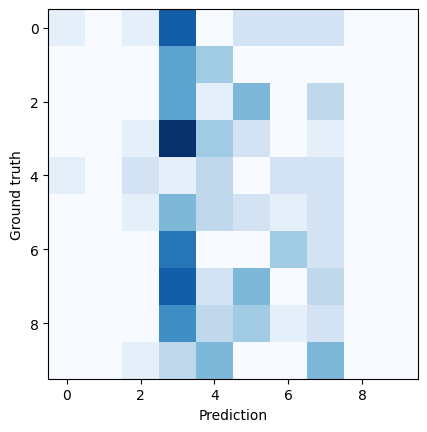

In [31]:
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Prediction');
plt.ylabel('Ground truth');

## Classification of recodrs using Duration of the records

In [11]:
def duration(input):
    return np.array(input.shape)

In [33]:
# Data loading
X_train, X_test, y_train, y_test = load_data('C:/Users/sam/Desktop/DSP/data/recordings/recordings',feature_extractor=duration)

In [34]:
# SVM initialization and training
clf = SVC(kernel='rbf', class_weight='balanced')
clf = clf.fit(X_train, y_train)

In [35]:
# SVM test
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.41      0.36        17
           1       0.22      0.40      0.29        10
           2       0.00      0.00      0.00        15
           3       0.38      0.26      0.31        19
           4       0.38      0.27      0.32        11
           5       0.00      0.00      0.00        14
           6       0.67      0.14      0.24        14
           7       0.33      0.05      0.09        19
           8       0.26      0.71      0.38        17
           9       0.06      0.14      0.08        14

    accuracy                           0.24       150
   macro avg       0.26      0.24      0.21       150
weighted avg       0.27      0.24      0.21       150



c:\Users\sam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Confusion matrix:


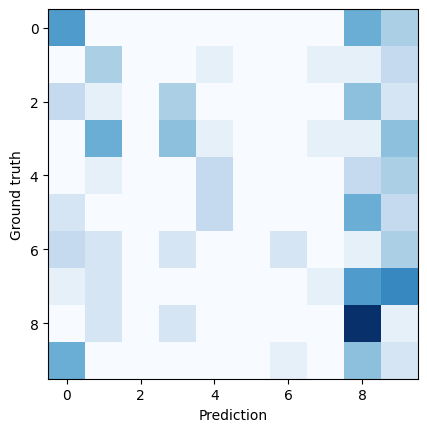

In [36]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Prediction');
plt.ylabel('Ground truth');

## Features combining features with normalization

In [37]:
def combo(input):
    return np.concatenate((energy(input),duration(input)))

In [38]:
# Data loading
X_train, X_test, y_train, y_test = load_data('C:/Users/sam/Desktop/DSP/data/recordings/recordings',feature_extractor=combo, normalize=True)

print('Numer of training examples: {}'.format(len(X_train)))
print('Dimensionality of the training features: {}'.format(X_train[0].shape))

Numer of training examples: 1350
Dimensionality of the training features: (2,)


In [39]:
# SVM initialization and training
clf = SVC(kernel='rbf', class_weight='balanced')
clf = clf.fit(X_train, y_train)


In [40]:
# SVM test
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.24      0.35        17
           1       0.11      0.10      0.11        10
           2       0.00      0.00      0.00        15
           3       0.39      0.63      0.48        19
           4       0.46      0.55      0.50        11
           5       0.17      0.14      0.15        14
           6       0.50      0.14      0.22        14
           7       0.38      0.16      0.22        19
           8       0.09      0.12      0.10        17
           9       0.26      0.71      0.38        14

    accuracy                           0.28       150
   macro avg       0.30      0.28      0.25       150
weighted avg       0.31      0.28      0.25       150



Confusion matrix:


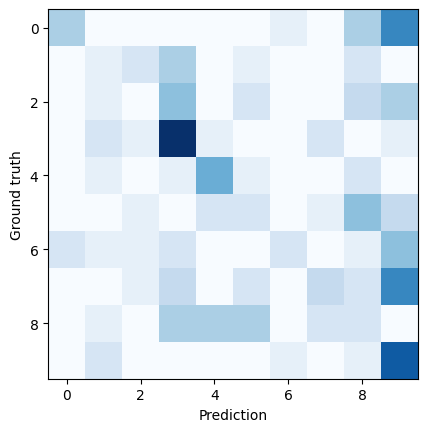

In [41]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Prediction');
plt.ylabel('Ground truth');

## Hyperparameter optimization

In [42]:
# Data loading
X_train, X_test, y_train, y_test = load_data('C:/Users/sam/Desktop/DSP/data/recordings/recordings',feature_extractor=combo, normalize=True)

In [43]:
# Parameters to be tested in cross-validation
param_grid = {'C': [100, 500, 1000],
          'gamma': [0.005, 0.01, 0.1, 0.5, 1.0], }

# Support Vector Machine initialization
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=2)

# Training
t0 = time()
clf = clf.fit(X_train, y_train)
print('Training completed in %0.3fs' % (time() - t0))

Training completed in 9.157s


In [44]:
# Result of the cross validation for parameters selection
print('Best parameters combination:')
print(' C: '+str(clf.best_estimator_.C))
print(' gamma: '+str(clf.best_estimator_.gamma))

Best parameters combination:
 C: 1000
 gamma: 0.1


In [45]:
# SVM test
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48        17
           1       0.15      0.20      0.17        10
           2       0.00      0.00      0.00        15
           3       0.38      0.53      0.44        19
           4       0.45      0.45      0.45        11
           5       0.19      0.21      0.20        14
           6       0.47      0.50      0.48        14
           7       0.36      0.21      0.27        19
           8       0.14      0.12      0.13        17
           9       0.36      0.57      0.44        14

    accuracy                           0.33       150
   macro avg       0.30      0.33      0.31       150
weighted avg       0.31      0.33      0.31       150



Confusion matrix:


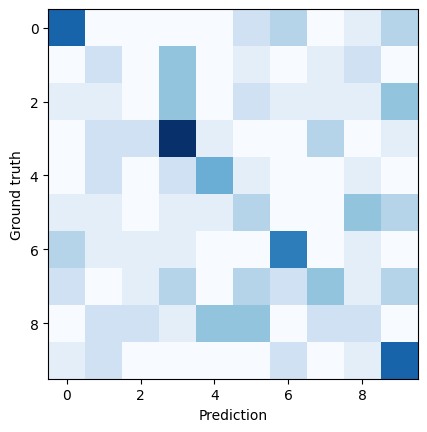

In [46]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Prediction');
plt.ylabel('Ground truth');

# Assignment: Zero-Crossing Rate

**Zero-Crossing Rate**:
count how many times the signal goes from positive to negative, and from negative to positive.

Possible approach:

1. Shift the signal by one unit
2. Compare point-by-point the sign (``np.sign()``) of the original signal and of the shifted signal
3. Accumulate the instances of sign change

Compare the signs of the values belonging to the signal (current position) with those of the signal shifted by one position (next position), creating an array containing the values:

0 --> if the signs of the values are the same
1 --> if the signs of the values are different, there is a sign change
Thus, we will have an array containing the value 1 for each sign change, then summing all the values of 1 to obtain the requested feature.

In particular, in the function below:

np.roll allows shifting the array by one position.
np.sign allows extracting the sign of a value.
np.where allows specifying an action to be performed depending on a condition.

In [6]:
sample_rate = 44100  # Example sample rate


In [23]:


def zcrc(input):
  input=input[input != 0]
  sign = np.array(np.where(np.sign(input)*np.sign(np.roll(input, -1)) < 0, 1, 0))
  output = np.sum(sign, keepdims=True)
  return output

In [24]:
# Combine feature extraction functions
def combo2(input):
    return np.concatenate((energy(input), duration(input), zcrc(input)))



In [25]:
# Data loading
X_train, X_test, y_train, y_test = load_data('C:/Users/sam/Desktop/DSP/data/recordings/recordings',feature_extractor=combo2, normalize=True)



In [31]:

# Parameters to be tested in cross-validation
param_grid = {'C': [100, 500, 1000],
          'gamma': [0.005, 0.01, 0.1, 0.5, 1.0], }

# Support Vector Machine initialization
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=2)

# Training
t0 = time()
clf = clf.fit(X_train, y_train)
print('Training completed in %0.3fs' % (time() - t0))


Training completed in 6.267s


In [27]:
# Result of the cross validation for parameters selection
print('Best parameters combination:')
print(' C: '+str(clf.best_estimator_.C))
print(' gamma: '+str(clf.best_estimator_.gamma))

Best parameters combination:
 C: 100
 gamma: 1.0


In [32]:

# SVM test
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52        28
           1       0.36      0.46      0.41        28
           2       0.50      0.41      0.45        34
           3       0.47      0.45      0.46        31
           4       0.35      0.28      0.31        25
           5       0.38      0.58      0.46        24
           6       0.95      0.71      0.82        28
           7       0.42      0.34      0.38        38
           8       0.59      0.58      0.59        38
           9       0.47      0.54      0.50        26

    accuracy                           0.49       300
   macro avg       0.50      0.49      0.49       300
weighted avg       0.50      0.49      0.49       300



Confusion matrix:


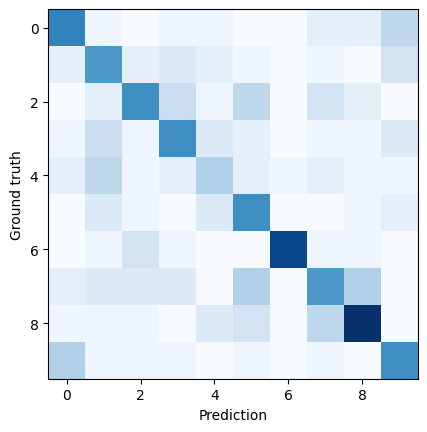

In [33]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Prediction');
plt.ylabel('Ground truth');

The model shows moderate performance overall, with significant variability between different classes.

** Some classes like 6, 8, and 0 have relatively higher diagonal values, indicating better performance for these classes, , while others like 2, 4 need significant improvement.

** The overall accuracy of 49% indicates room for improvement.

** Focusing on enhancing recall for underperforming classes and reducing false positives could help improve overall performance.